In [1]:
import os
import cv2
import glob
import numpy as np
import pandas as pd

from keras.models import *
from keras.optimizers import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *

Using TensorFlow backend.


In [2]:
dir = "/input/"

model_image_size = (320, 480)
fine_tune_layer = 172
final_layer = 314
visual_layer = 311
batch_size = 128

In [3]:
train_gen = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    rotation_range=10.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.1,
)
gen = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
)

train_generator = train_gen.flow_from_directory(os.path.join(dir, 'train'),  model_image_size, shuffle=True, batch_size=batch_size, class_mode="categorical")
print("subdior to train type {}".format(train_generator.class_indices))
valid_generator = gen.flow_from_directory(os.path.join(dir, 'valid'),  model_image_size, shuffle=True, batch_size=batch_size, class_mode="categorical")
print("subdior to valid type {}".format(valid_generator.class_indices))

/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras_preprocessing/image.py:848: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 15506 images belonging to 10 classes.
subdior to train type {'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
Found 2644 images belonging to 10 classes.
subdior to valid type {'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}


In [4]:
input_tensor = Input((*model_image_size, 3))
x = input_tensor
x = Lambda(inception_v3.preprocess_input)(x)

base_model = InceptionV3(input_tensor=x, weights='imagenet', include_top=False)

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)
model = Model(base_model.input, x)

print("total layer count {}".format(len(base_model.layers)))

for i in range(fine_tune_layer):
    model.layers[i].trainable = False


87916544/87910968 [==============================] - 157s 2us/step
total layer count 312


In [5]:
print("train_generator.samples = {}".format(train_generator.samples))
print("valid_generator.samples = {}".format(valid_generator.samples))
steps_train_sample = train_generator.samples // 128 + 1
steps_valid_sample = valid_generator.samples // 128 + 1

train_generator.samples = 15506
valid_generator.samples = 2644


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=steps_train_sample, epochs=4, validation_data=valid_generator, validation_steps=steps_valid_sample)

#model.save("/data/inceptionV3-imagenet-finetune{}-adam.h5".format(fine_tune_layer))
print("done!")

Epoch 1/4


/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras_preprocessing/image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras_preprocessing/image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


122/122 [==============================] - 626s 5s/step - loss: 0.0595 - acc: 0.9829 - val_loss: 3.0621 - val_acc: 0.5242
Epoch 2/4
122/122 [==============================] - 599s 5s/step - loss: 0.0066 - acc: 0.9984 - val_loss: 13.9791 - val_acc: 0.1229
Epoch 3/4
122/122 [==============================] - 602s 5s/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.9661 - val_acc: 0.8177
Epoch 4/4
122/122 [==============================] - 602s 5s/step - loss: 0.0013 - acc: 0.9997 - val_loss: 2.3925 - val_acc: 0.6740
done!


In [7]:
#model.save("/data/inceptionV3-imagenet-finetune{}-adam.h5".format(fine_tune_layer))
#print("model saved!")

In [7]:

model.compile(optimizer=RMSprop(lr=1*0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=steps_train_sample, epochs=6, validation_data=valid_generator, validation_steps=steps_valid_sample)

#model.save("/data/inceptionV3-finetune{}.h5".format(fine_tune_layer))
print("model saved!")

Epoch 1/6
122/122 [==============================] - 622s 5s/step - loss: 6.9007e-04 - acc: 0.9998 - val_loss: 0.8596 - val_acc: 0.8763
Epoch 2/6
122/122 [==============================] - 601s 5s/step - loss: 0.0051 - acc: 0.9990 - val_loss: 0.7539 - val_acc: 0.9013
Epoch 3/6
122/122 [==============================] - 603s 5s/step - loss: 1.4636e-04 - acc: 1.0000 - val_loss: 0.7835 - val_acc: 0.8933
Epoch 4/6
122/122 [==============================] - 603s 5s/step - loss: 8.6201e-05 - acc: 1.0000 - val_loss: 0.6968 - val_acc: 0.9092
Epoch 5/6
122/122 [==============================] - 603s 5s/step - loss: 4.1576e-05 - acc: 1.0000 - val_loss: 0.6671 - val_acc: 0.9179
Epoch 6/6
122/122 [==============================] - 603s 5s/step - loss: 1.7206e-05 - acc: 1.0000 - val_loss: 0.7430 - val_acc: 0.9096
model saved!


In [8]:
model.save("/data/inception-finetune.h5")
print("model saved!")

model saved!


In [9]:
z = zip([x.name for x in model.layers], range(len(model.layers)))
for k, v in z:
    print("{} - {}".format(k,v))

input_1 - 0
lambda_1 - 1
conv2d_1 - 2
batch_normalization_1 - 3
activation_1 - 4
conv2d_2 - 5
batch_normalization_2 - 6
activation_2 - 7
conv2d_3 - 8
batch_normalization_3 - 9
activation_3 - 10
max_pooling2d_1 - 11
conv2d_4 - 12
batch_normalization_4 - 13
activation_4 - 14
conv2d_5 - 15
batch_normalization_5 - 16
activation_5 - 17
max_pooling2d_2 - 18
conv2d_9 - 19
batch_normalization_9 - 20
activation_9 - 21
conv2d_7 - 22
conv2d_10 - 23
batch_normalization_7 - 24
batch_normalization_10 - 25
activation_7 - 26
activation_10 - 27
average_pooling2d_1 - 28
conv2d_6 - 29
conv2d_8 - 30
conv2d_11 - 31
conv2d_12 - 32
batch_normalization_6 - 33
batch_normalization_8 - 34
batch_normalization_11 - 35
batch_normalization_12 - 36
activation_6 - 37
activation_8 - 38
activation_11 - 39
activation_12 - 40
mixed0 - 41
conv2d_16 - 42
batch_normalization_16 - 43
activation_16 - 44
conv2d_14 - 45
conv2d_17 - 46
batch_normalization_14 - 47
batch_normalization_17 - 48
activation_14 - 49
activation_17 - 50
a

In [20]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
dir = "/data/"
def show_heatmap_image(model_show, weights_show):
    #test_dir = os.path.join(dir,  "test", "test" )
    test_dir = os.path.join(dir, "test" )
    image_files = glob.glob(os.path.join(test_dir,"*"))
    print(len(image_files))
    
    plt.figure(figsize=(16, 18))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        img = cv2.imread(image_files[i])
        img = cv2.resize(img,  (model_image_size[1],model_image_size[0]))
        x = img.copy()
        x.astype(np.float32)
        out, predictions = model_show.predict(np.expand_dims(x, axis=0))
        predictions = predictions[0]
        out = out[0]
        
        max_idx = np.argmax(predictions)
        prediction = predictions[max_idx]

        status = ["pa",  " yangtou",  "diantou",  "shuohua",  "zhengchang",  
                  "zuoshou", "youshou", "jingchengdan", "shouyinji", "futou"]

        plt.title('c%d |%s| %.2f%%' % (max_idx , status[max_idx], prediction*100))
    
        cam = (prediction - 0.5) * np.matmul(out, weights_show)
        cam = cam[:,:,max_idx]
        cam -= cam.min()
        cam /= cam.max()
        cam -= 0.2
        cam /= 0.8

        cam = cv2.resize(cam, (model_image_size[1],model_image_size[0]))
        heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heatmap[np.where(cam <= 0.2)] = 0

        out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

        plt.axis('off')
        plt.imshow(out[:,:,::-1])
print("ok")

ok


layer_output Tensor("mixed10/concat:0", shape=(?, 8, 13, 2048), dtype=float32)
weights shape (2048, 10)
20


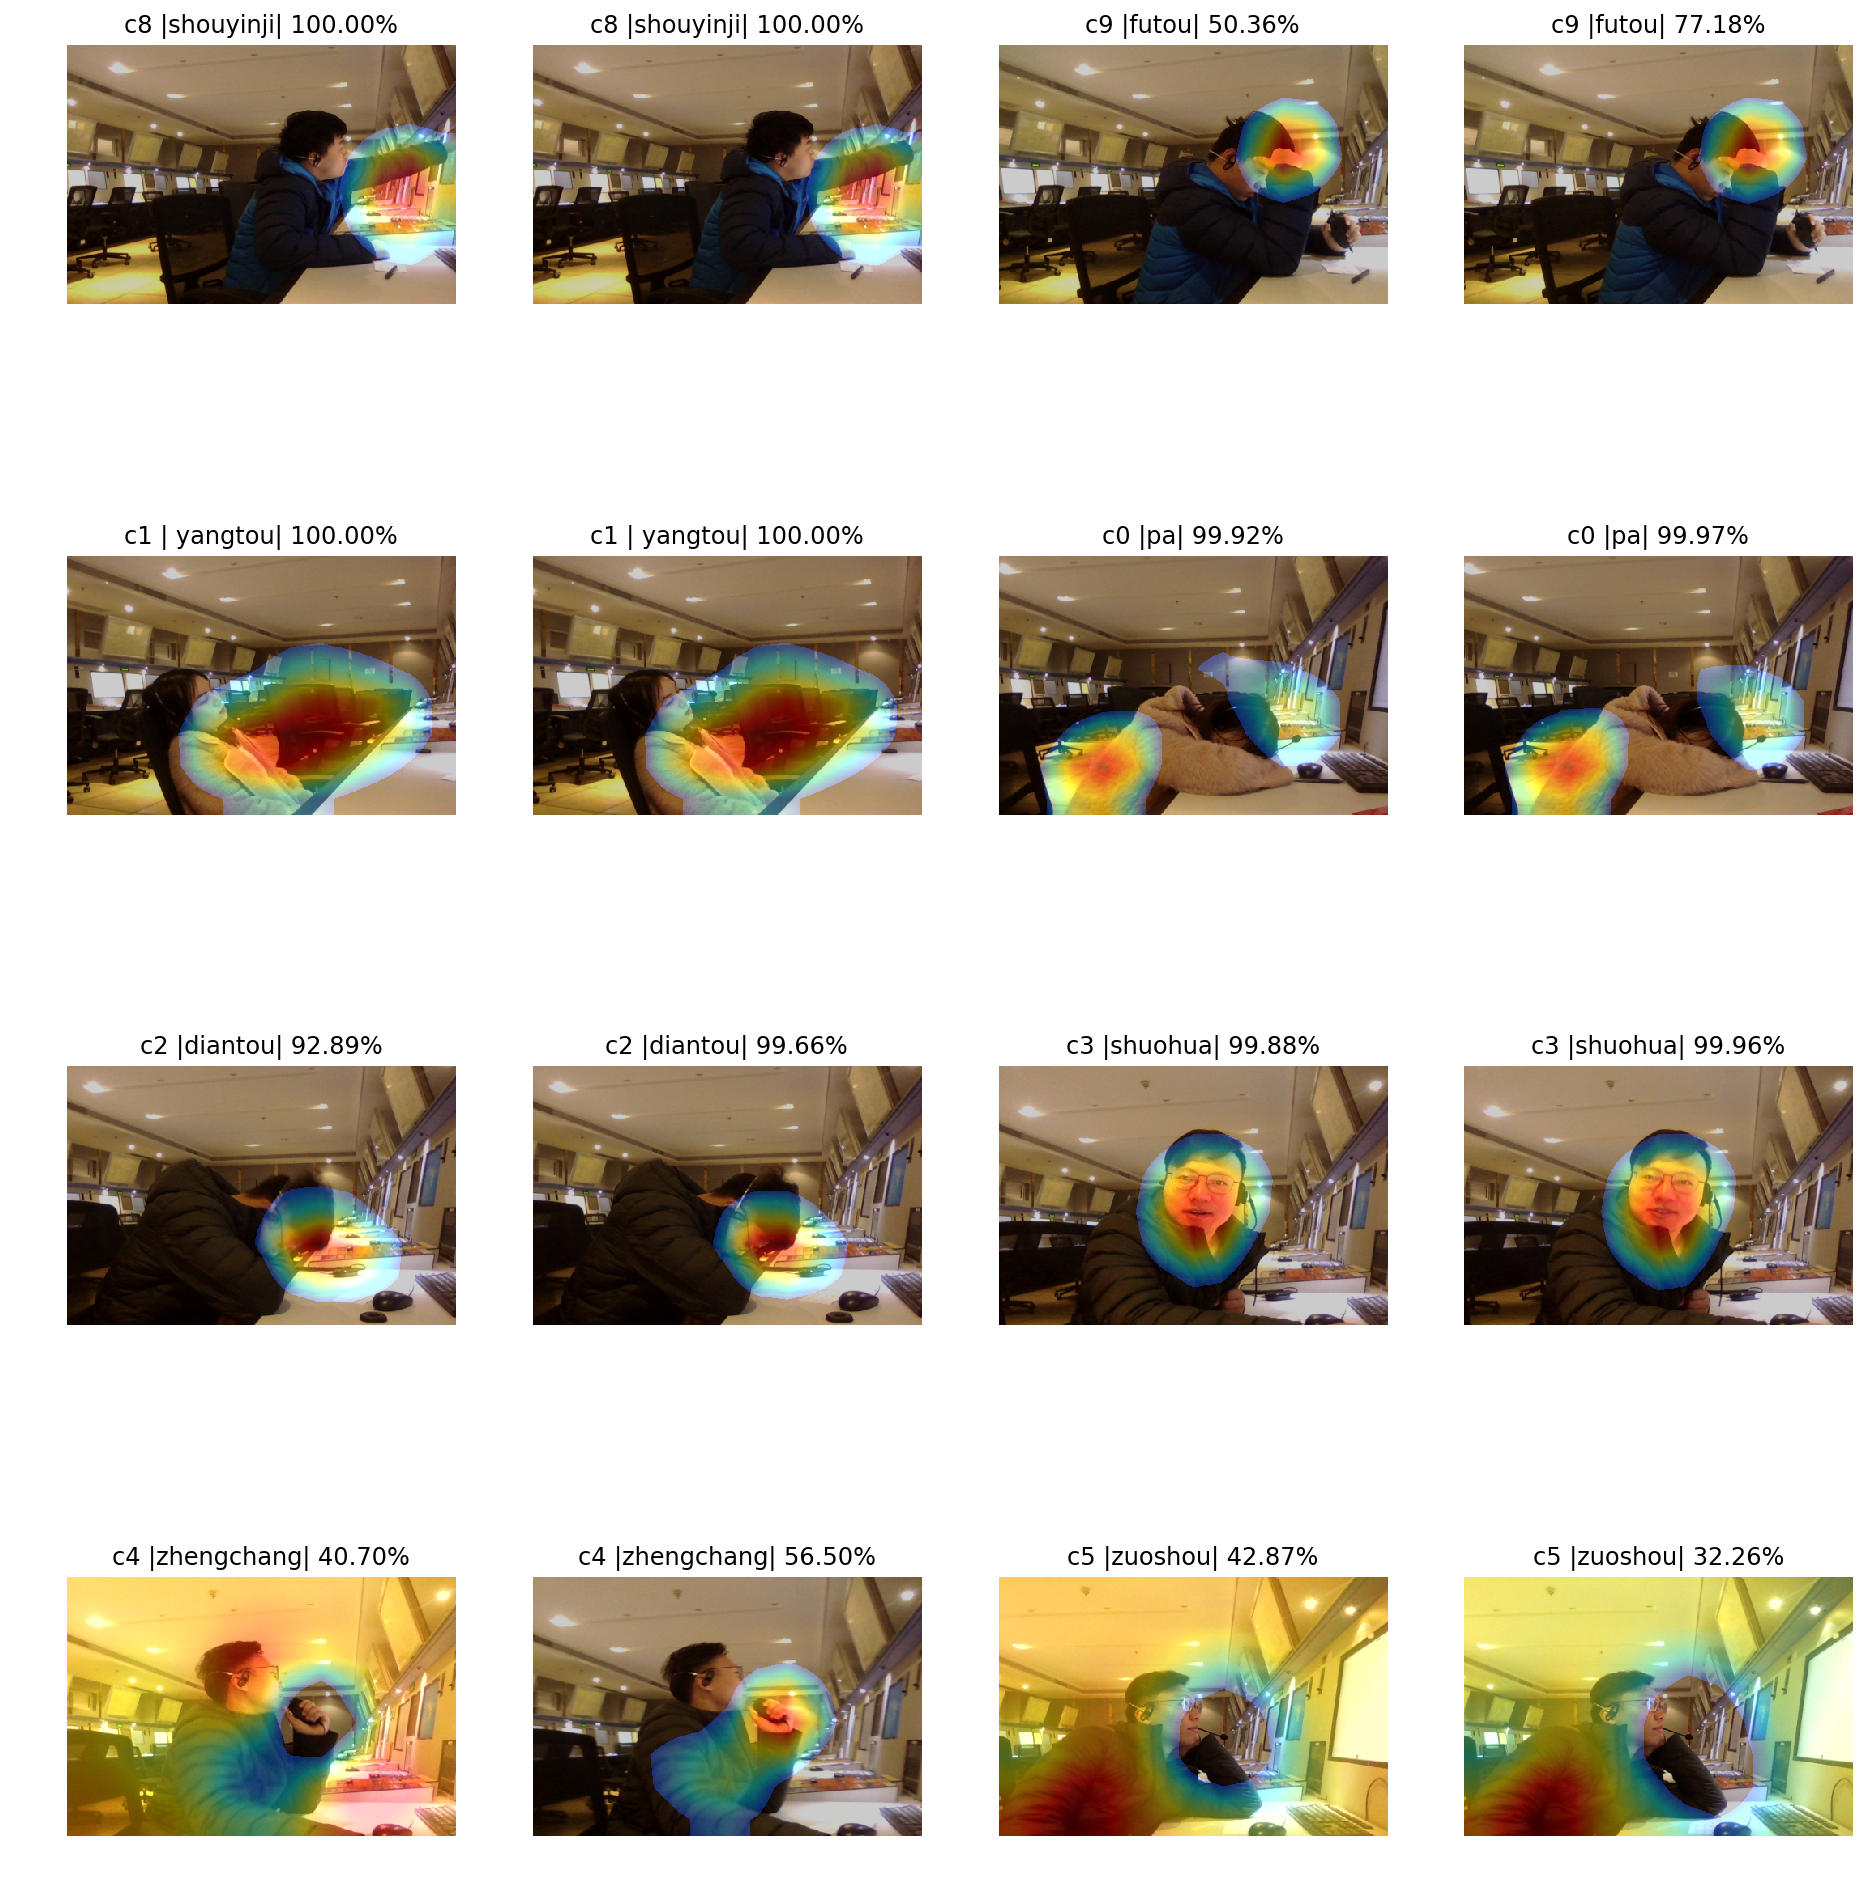

In [21]:
weights = model.layers[final_layer].get_weights()[0]
layer_output = model.layers[visual_layer].output
model2 = Model(model.input, [layer_output, model.output])
print("layer_output {0}".format(layer_output))
print("weights shape {0}".format(weights.shape))
show_heatmap_image(model2, weights)